In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
data = pd.read_csv('/content/AML - Copy.csv')

In [ ]:
data

,Date,Time,kWh
0,01-01-2023,00:00:00,178.5
1,01-01-2023,00:15:00,231.0
2,01-01-2023,00:30:00,252.0
3,01-01-2023,00:45:00,250.5
4,01-01-2023,01:00:00,246.0
...,...,...,...
43767,31-03-2024,22:45:00,321.0
43768,31-03-2024,23:00:00,324.0
43769,31-03-2024,23:15:00,328.5
43770,31-03-2024,23:30:00,324.0


In [ ]:
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], dayfirst=True, errors='coerce')

In [ ]:
import matplotlib.pyplot as plt


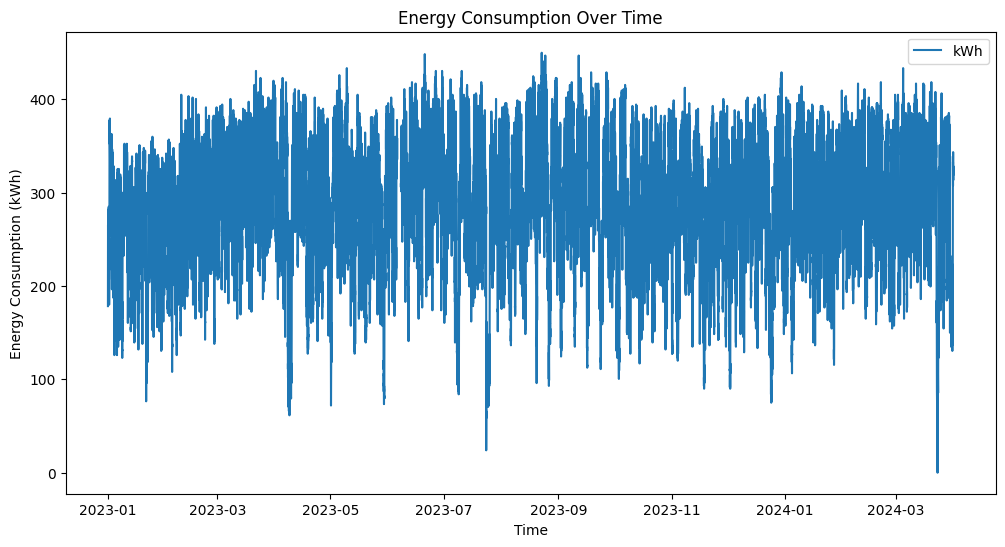

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['kWh'], label='kWh')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption Over Time')
plt.legend()
plt.show()

In [ ]:
# Month assign

month1 = 1  # January
month2 = 2  # February
month3 = 3 # March
month4 = 4 # April
month5 = 5 # May
month6 = 6 # June
month7 = 7 # July
month8 = 8 # August
month9 = 9 # September
month10 = 10 # October
month11 = 11 # November
month12 = 12 # December

**Checking Relation Between to same month **

In [ ]:
month1_data = data[data['datetime'].dt.month == month1]
month2_data = data[data['datetime'].dt.month == month2]

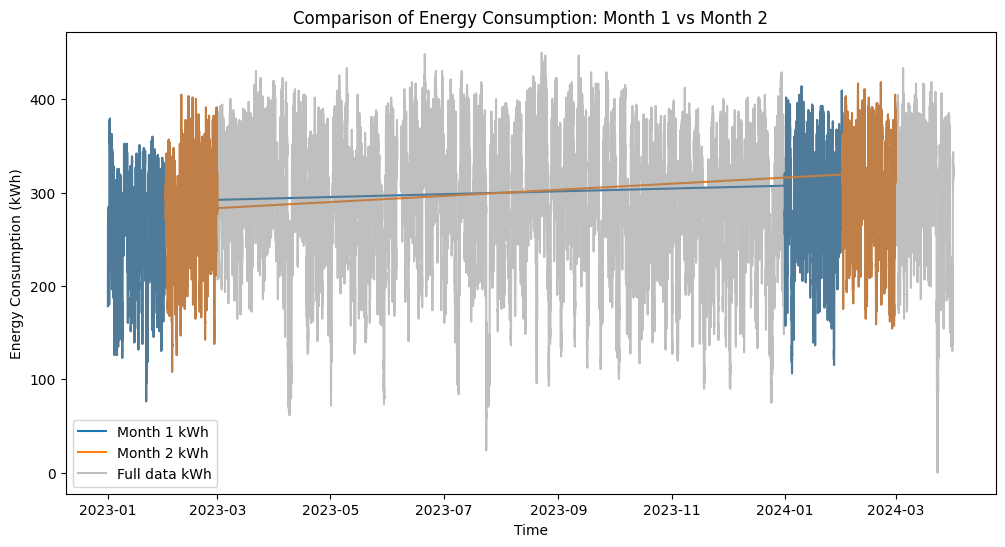

In [ ]:
plt.figure(figsize=(12, 6))

# Plot month 1 data
plt.plot(month1_data['datetime'], month1_data['kWh'], label=f'Month {month1} kWh')

# Plot month 2 data
plt.plot(month2_data['datetime'], month2_data['kWh'], label=f'Month {month2} kWh')

# Plot the full data pattern for reference
plt.plot(data['datetime'], data['kWh'], label='Full data kWh', alpha=0.5, color='gray')

# Add labels and a title to the plot
plt.xlabel('Time')
plt.ylabel('Energy Consumption (kWh)')
plt.title(f'Comparison of Energy Consumption: Month {month1} vs Month {month2}')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Define the date ranges for comparison
current_month = pd.Timestamp.now().month
current_year = pd.Timestamp.now().year
previous_month = (current_month - 1) if current_month > 1 else 12
previous_year = current_year if current_month > 1 else (current_year - 1)

In [ ]:
# first month and year
month1 = int(input("Enter the first month (1-12): "))
year1 = int(input("Enter the first year: "))

# second month and year
month2 = int(input("Enter the second month (1-12): "))
year2 = int(input("Enter the second year: "))

Enter the first month (1-12): 6
Enter the first year: 2023
Enter the second month (1-12): 7
Enter the second year: 2023


In [ ]:
# Filter data for the first month and year
month1_data = data[(data['datetime'].dt.month == month1) & (data['datetime'].dt.year == year1)]

# Filter data for the second month and year
month2_data = data[(data['datetime'].dt.month == month2) & (data['datetime'].dt.year == year2)]


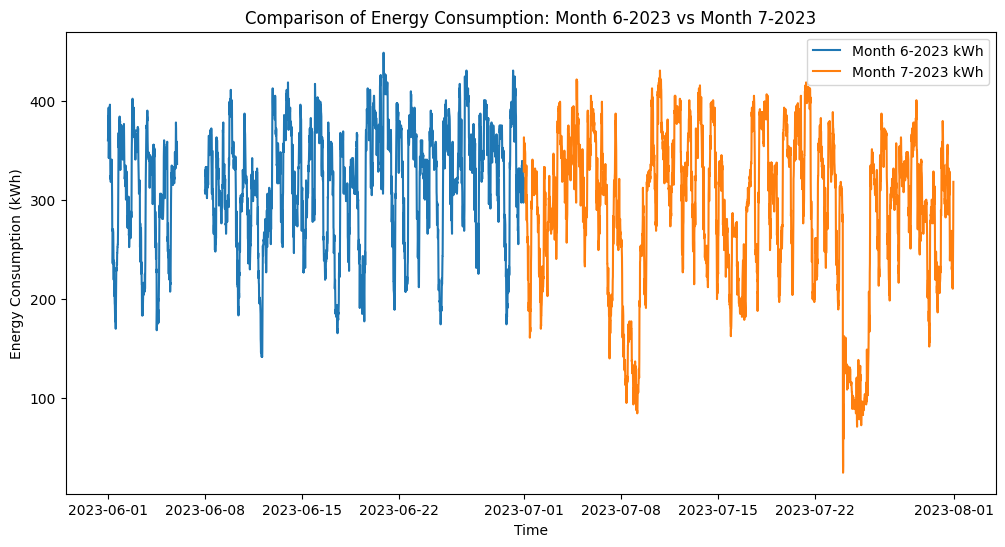

The patterns of the two months are somewhat similar.
Gap from 2023-06-06 00:00:00 to 2023-06-07 23:45:00.


In [ ]:
# Plot energy consumption for the first month
plt.figure(figsize=(12, 6))

# Plot month 1 data
plt.plot(month1_data['datetime'], month1_data['kWh'], label=f'Month {month1}-{year1} kWh')

# Plot month 2 data
plt.plot(month2_data['datetime'], month2_data['kWh'], label=f'Month {month2}-{year2} kWh')

# Add labels and a title to the plot
plt.xlabel('Time')
plt.ylabel('Energy Consumption (kWh)')
plt.title(f'Comparison of Energy Consumption: Month {month1}-{year1} vs Month {month2}-{year2}')
plt.legend()

# Show the plot
plt.show()

# Calculate correlation coefficient
correlation_coefficient = month1_data['kWh'].corr(month2_data['kWh'])

# Print comparison result
if correlation_coefficient > 0.5:
    print("The patterns of the two months are very similar.")
elif correlation_coefficient < -0.3:
    print("The patterns of the two months are very different.")
else:
    print("The patterns of the two months are somewhat similar.")


# Check for gaps in the kWh data (missing values)
is_na = data['kWh'].isna()

# Initialize variables for tracking gaps
in_gap = False
gap_start = None

# Iterate through the data to find gaps
for i in range(len(data)):
    if is_na[i]:
        # We are in a gap
        if not in_gap:
            # This is the start of a new gap
            in_gap = True
            gap_start = data['datetime'][i]
    else:
        # We are no longer in a gap
        if in_gap:
            # This is the end of the current gap
            gap_end = data['datetime'][i - 1]
            print(f"Gap from {gap_start} to {gap_end}.")
            in_gap = False
            gap_start = None

# If we are still in a gap at the end of the data, print the gap
if in_gap:
    gap_end = data['datetime'].iloc[-1]
    print(f"Gap from {gap_start} to {gap_end}.")

In [ ]:
# Check for extreme peaks
max_peak = month1_data['kWh'].max()
min_peak = month1_data['kWh'].min()
if max_peak > 1000:
    max_peak_idx = month1_data['kWh'].idxmax()
    print(f"Extreme high peak of {max_peak} kWh occurred at {month1_data['datetime'][max_peak_idx]}.")
if min_peak < 10:
    min_peak_idx = month1_data['kWh'].idxmin()
    print(f"Extreme low peak of {min_peak} kWh occurred at {month1_data['datetime'][min_peak_idx]}.")

In [ ]:
# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(((month1_data['kWh'] - month2_data['kWh']) ** 2).mean())

# Compare summary statistics
mean_diff = abs(month1_data['kWh'].mean() - month2_data['kWh'].mean())
median_diff = abs(month1_data['kWh'].median() - month2_data['kWh'].median())
std_dev_diff = abs(month1_data['kWh'].std() - month2_data['kWh'].std())

# Determine if the data patterns are similar based on the comparison of RMSE and summary statistics
threshold_rmse = 100  # You can adjust this threshold based on your requirement
threshold_summary = 100  # You can adjust this threshold based on your requirement

if rmse <= threshold_rmse and mean_diff <= threshold_summary and median_diff <= threshold_summary and std_dev_diff <= threshold_summary:
    print("The data patterns for the two months are similar.")
else:
    print("The data patterns for the two months are not similar.")

The data patterns for the two months are not similar.
